**Author**: CodeForAll  
**License**: MIT License

--- 

# 🧪 Mass-Spring-Damper System: From Instability to Stability Using Pole Placement

This note documents a control experiment on a classic **mass-spring-damper system**, showing how an initially **unstable system** can be stabilized using **state feedback control** via **pole placement**.

---

## ⚙️ System Description

We analyze a second-order mechanical system described by:

$$
m \ddot{x} + c \dot{x} + k x = u(t)
$$

Where:

- $m$ = mass (kg)  
- $c$ = damping coefficient (Ns/m)  
- $k$ = spring constant (N/m)  
- $u(t)$ = external force (control input)

---

## 🧮 State-Space Representation

We define state variables:

$$
x_1 = x, \quad x_2 = \dot{x}
$$

Thus, the system becomes:

$$
\begin{aligned}
\dot{x}_1 &= x_2 \\
\dot{x}_2 &= -\frac{k}{m} x_1 - \frac{c}{m} x_2 + \frac{1}{m} u
\end{aligned}
$$

This can be written in matrix form as:

$$
\dot{x} = A x + B u, \quad y = C x + D u
$$

With:

$$
A = \begin{bmatrix} 0 & 1 \\ -\frac{k}{m} & -\frac{c}{m} \end{bmatrix}, \quad
B = \begin{bmatrix} 0 \\ \frac{1}{m} \end{bmatrix}, \quad
C = \begin{bmatrix} 1 & 0 \end{bmatrix}, \quad
D = \begin{bmatrix} 0 \end{bmatrix}
$$

---

## 🚫 Step 1: Unstable System Setup

We choose parameters that make the system **physically unstable**:

- $m = 1.0$ kg  
- $c = -0.5$ Ns/m (negative damping)  
- $k = 1.0$ N/m (low stiffness)

These values lead to **positive real parts in system poles**, causing oscillations that **grow over time**.

The **open-loop response** to a step input shows increasing amplitude — **a hallmark of instability**.

---

## ✅ Step 2: Pole Placement for Stabilization

We now design a **state feedback controller** of the form:

$$
u = -Kx
$$

This modifies the system to:

$$
\dot{x} = (A - BK)x
$$

We choose desired poles:

$$
\lambda_{1,2} = -2 \pm j
$$

These poles represent a **stable, underdamped** system with fast settling and mild oscillations.

The feedback gain matrix $K$ is computed using pole placement techniques so that the closed-loop system matrix:

$$
A_{\text{cl}} = A - BK
$$

has the desired eigenvalues (i.e., closed-loop poles).

---

## 📊 Step 3: Response Comparison

### Open-Loop System (Before Control)

- Oscillations grow uncontrollably.
- System is **unstable** due to negative damping.
- Position and velocity increase indefinitely.

### Closed-Loop System (After Pole Placement)

- Oscillations are controlled and decay over time.
- The system is **stable and underdamped**.
- Both position and velocity eventually settle to steady-state.

The plots of both cases (side-by-side) visually demonstrate the **effectiveness of pole placement**.

---

## 🧾 Conclusion

- Starting with an **unstable mechanical system**, we used **pole placement** to stabilize it.
- Feedback gain $K$ was designed to move system poles into the **left-half complex plane**.
- The experiment confirms that, if a system is **controllable**, its behavior can be **entirely shaped** by state feedback.
- This approach is foundational in **modern control theory**, especially for systems where traditional PID control is insufficient.

---

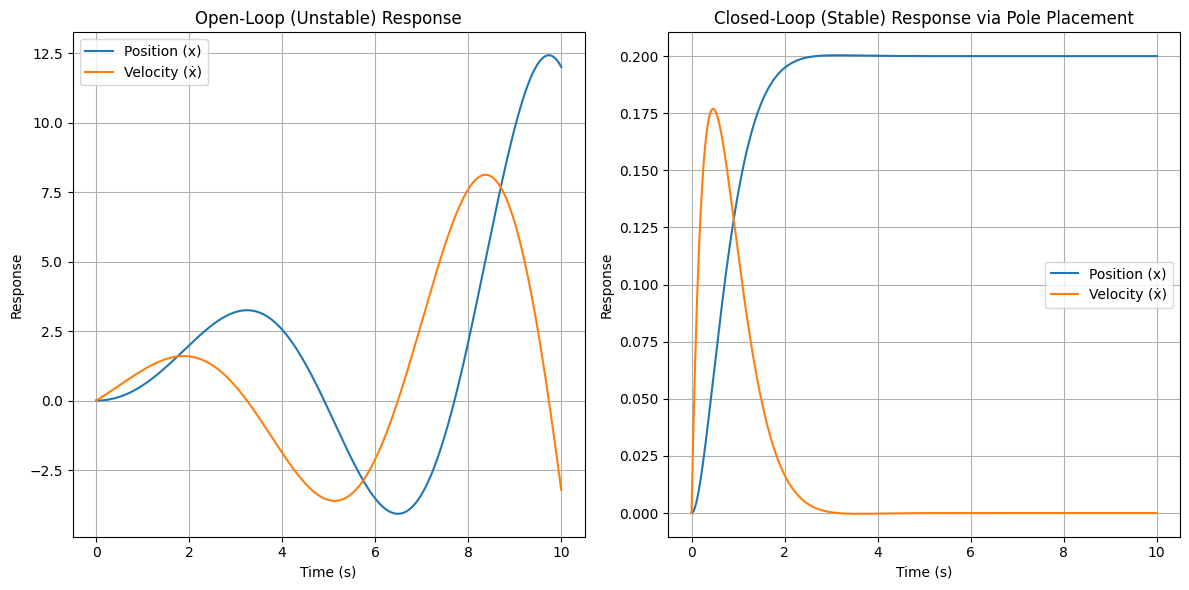

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from control import ss, place, input_output_response

# Step 1: Start with an unstable or underdamped system
m = 1.0    # kg
c = -0.5   # NEGATIVE damping (non-physical but used for instability)
k = 1.0    # N/m (low stiffness)

# State-space representation
A = np.array([[0, 1],
              [-k/m, -c/m]])
B = np.array([[0],
              [1/m]])
C = np.array([[1, 0]])
D = np.array([[0]])

# Create the open-loop system
system_ol = ss(A, B, C, D)

# Time and input (step input)
T = np.linspace(0, 10, 500)
U = np.ones_like(T)

# Simulate open-loop response
T, yout_ol, xout_ol = input_output_response(system_ol, T, U, return_x=True)

# Step 2: Design feedback using pole placement for desired stable behavior
desired_poles = np.array([-2 + 1j, -2 - 1j])
K = place(A, B, desired_poles)

# Closed-loop system
A_cl = A - B @ K
system_cl = ss(A_cl, B, C, D)

# Simulate closed-loop response
T, yout_cl, xout_cl = input_output_response(system_cl, T, U, return_x=True)

# Step 3: Plot both before and after control
plt.figure(figsize=(12, 6))

# Open-loop (unstable) response
plt.subplot(1, 2, 1)
plt.plot(T, xout_ol[0], label='Position (x)')
plt.plot(T, xout_ol[1], label='Velocity (ẋ)')
plt.title("Open-Loop (Unstable) Response")
plt.xlabel("Time (s)")
plt.ylabel("Response")
plt.grid(True)
plt.legend()

# Closed-loop (controlled) response
plt.subplot(1, 2, 2)
plt.plot(T, xout_cl[0], label='Position (x)')
plt.plot(T, xout_cl[1], label='Velocity (ẋ)')
plt.title("Closed-Loop (Stable) Response via Pole Placement")
plt.xlabel("Time (s)")
plt.ylabel("Response")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
